<a href="https://colab.research.google.com/github/cedspam/notebooks/blob/master/data.gouv.fr/pilotage/resources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%run "librairies.ipynb"

In [0]:
df = pd.read_csv('data/resources.csv', sep=";", parse_dates=["created_at"])

df.count()

Unnamed: 0     265155
_id            265154
checksum        13257
created_at     265154
dataset.id     265155
description    186688
extras         256917
filesize        13467
filetype       265091
format         256987
metrics        265155
mime            56653
modified       265152
published      265152
title          263624
type           197392
url            265154
urlhash        265079
dtype: int64

In [0]:
df.filetype.value_counts()['file'] / df.filetype.value_counts()['remote']

0.08169943974962153

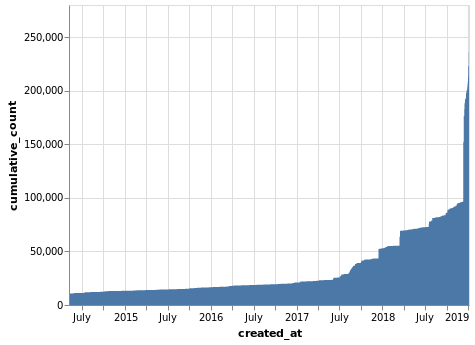

In [0]:
alt.Chart(df).mark_area().encode(
    x="created_at:T",
    y="cumulative_count:Q",
).transform_window(
    window=[{ "op": "count", "field": "count", "as": "cumulative_count"}],
    sort=[{'field': "created_at"}]
)

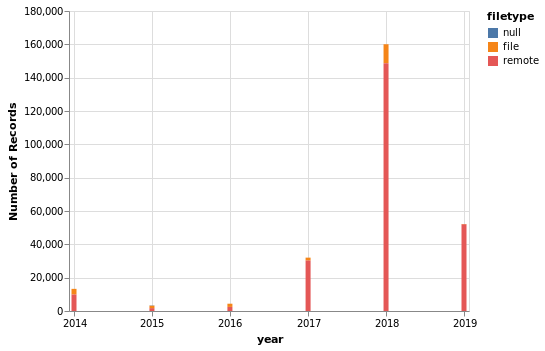

In [0]:
alt.Chart(df).mark_bar().encode(
    x = "year:T",
    y = "count():Q",
    color = "filetype:N"
).transform_timeunit(
    year = "year(created_at)"
)

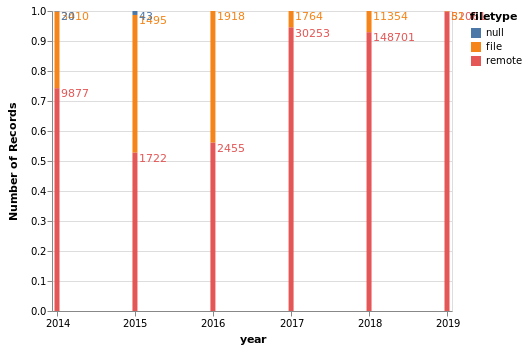

In [0]:
bars = alt.Chart(df).mark_bar().encode(
    alt.X(
        "year:T"
    ),
    alt.Y(
        "count():Q",
        stack="normalize"
    ),
    color = "filetype:N"
).transform_timeunit(
    year = "year(created_at)"
)

text = bars.mark_text(
    align='left',
    baseline="top",
    dx=4
).encode(
    text='count():Q'
)

bars + text